In [24]:
from openqaoa.workflows.optimizer import RQAOA, QAOA
from openqaoa.devices import create_device
from openqaoa.problems.problem import Knapsack
import networkx as nw

## problem

In [27]:
n_qubits = 6
g = nw.circulant_graph(n_qubits, [1])
# problem = MaximumCut(g).get_qubo_problem()
values = [1,2,3,4,5,6]
weights = [3,7,5,8,10,12]
weight_capacity = 35
problem = Knapsack(values,weights,weight_capacity,penalty=2*6).get_qubo_problem()

In [19]:
import numpy as np
counts = {'100100101':20, '100111010':10,'000100010':10}

x = [2,3,1,4,6,7,5,8,0]
final_order = x.copy()
np.random.shuffle(final_order)

In [20]:
final_order

[7, 2, 5, 6, 4, 3, 8, 0, 1]

In [21]:
def permute_string(string, original_order, final_order):
    # Create a mapping of original positions to final positions
    mapping = {original_order[i]: final_order[i] for i in range(len(original_order))}
    # Use the mapping to permute the string
    permuted_string = "".join([string[mapping[i]] for i in range(len(string))])
    return permuted_string

In [18]:
mapping = {x[i]: final_order[i] for i in range(len(x))}
mapping

{'a': 5}

In [23]:
permute_string(permute_string('100100101',x,final_order),final_order,x)

'100100101'

## QAOA

#### (default) QAOA

In [28]:
q = QAOA()
q.compile(problem)
q.optimize()

In [29]:
# QAOA optimized angles

q.results.optimized['angles']

[0.35, 1.35]

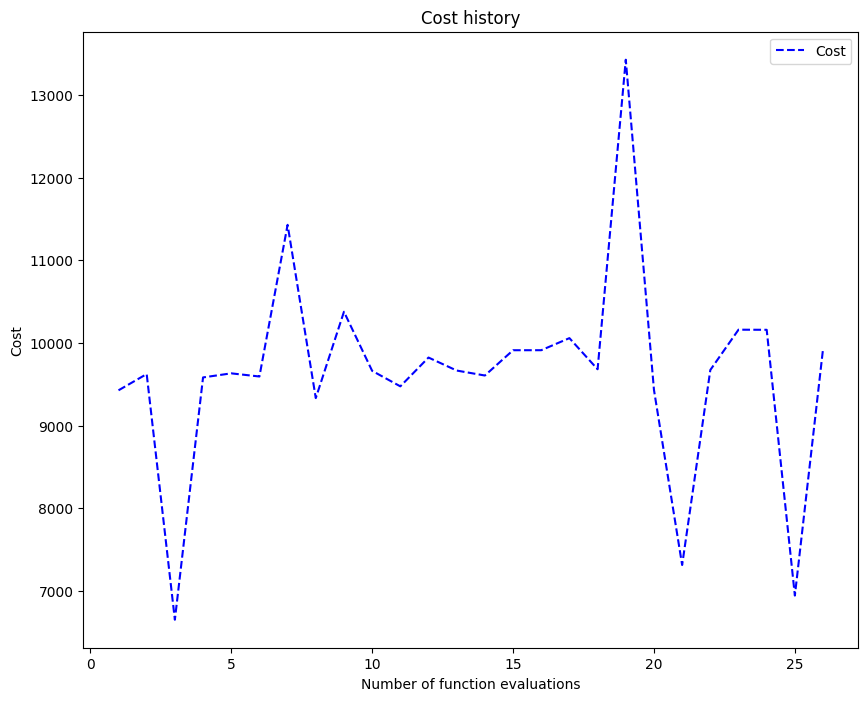

In [30]:
q.results.plot_cost()

In [31]:
q.results.intermediate['angles']

[[0.35, 0.35],
 [1.35, 0.35],
 [0.35, 1.35],
 [0.2792943537841083, 2.347497223852374],
 [0.3146471768920541, 1.8487486119261871],
 [0.10062569403690644, 1.3323235884460272],
 [0.8109081900925574, 1.1561865837832608],
 [0.1282942335395738, 1.2344727169963954],
 [0.4684680754409655, 1.3101212449879176],
 [0.31597624223074033, 1.4702804385894015],
 [0.30239881905488564, 1.309498425059876],
 [0.3810874952191969, 1.3468172117575297],
 [0.33601534027361446, 1.3779462303779457],
 [0.34094192577307575, 1.3372684676374158],
 [0.3577606070330949, 1.3508989631404444],
 [0.3449684852323688, 1.3559765387468927],
 [0.3485589469694827, 1.346369276211864],
 [0.34915691448792385, 1.3517617900229462],
 [0.35194562498503534, 1.3498290009262275],
 [0.34928560539527553, 1.349334181206974],
 [0.35048811661003904, 1.35001267888424],
 [0.3498770909747883, 1.3504725589387825],
 [0.3499575844166561, 1.349759572125025],
 [0.3499883805699685, 1.3500993226502152],
 [0.3500496613251075, 1.3500058097150158],
 [0.349

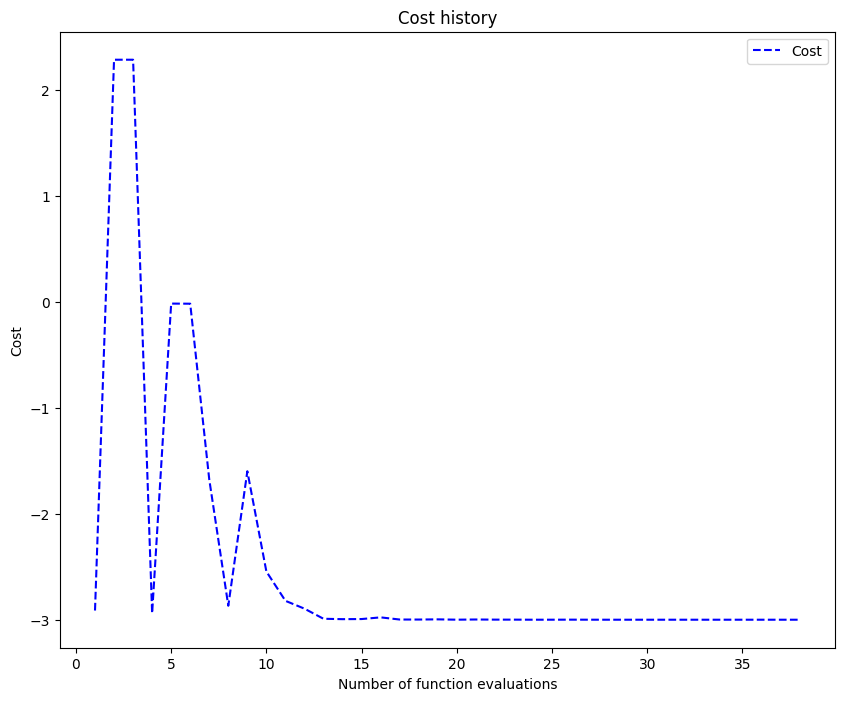

In [23]:
q.results.plot_cost()

in q128:

[0.36555461292063335, 0.3835115196403445]

#### QAOA custom initialization

In [12]:
q = QAOA()
q.set_circuit_properties(init_type='custom', variational_params_dict={'betas': [0], 'gammas': [0]})
q.compile(problem)
q.optimize()

In [13]:
# QAOA optimized angles

q.results.optimized['angles']

[-1.0222583209933234, 1.84528824231928]

in q128:

[-1.0874225657284482, 1.9803890272711173]

#### QAOA rand

In [15]:
q = QAOA()
device = create_device('local', 'qiskit.shot_simulator')
q.set_device(device)
q.set_circuit_properties(init_type='rand', seed=42)
q.set_backend_properties(seed_simulator=42)
q.compile(problem)
q.optimize()

In [16]:
# QAOA optimized angles

q.results.optimized['angles']

[1.144076381553985, 2.966361843332798]

in q128:

[1.1453336782485843, 2.9674260560559853]

#### QAOA gradient descent

In [12]:
q = QAOA()
q.set_classical_optimizer(method='vgd', jac='finite_difference')
q.set_circuit_properties(init_type='ramp')
q.compile(problem)
q.optimize()

In [13]:
# QAOA optimized angles

q.results.optimized['angles']

[-2.0617104510814612, -1.3183435048134848]

In [17]:
type(q.results.intermediate['angles'][0][0])

float

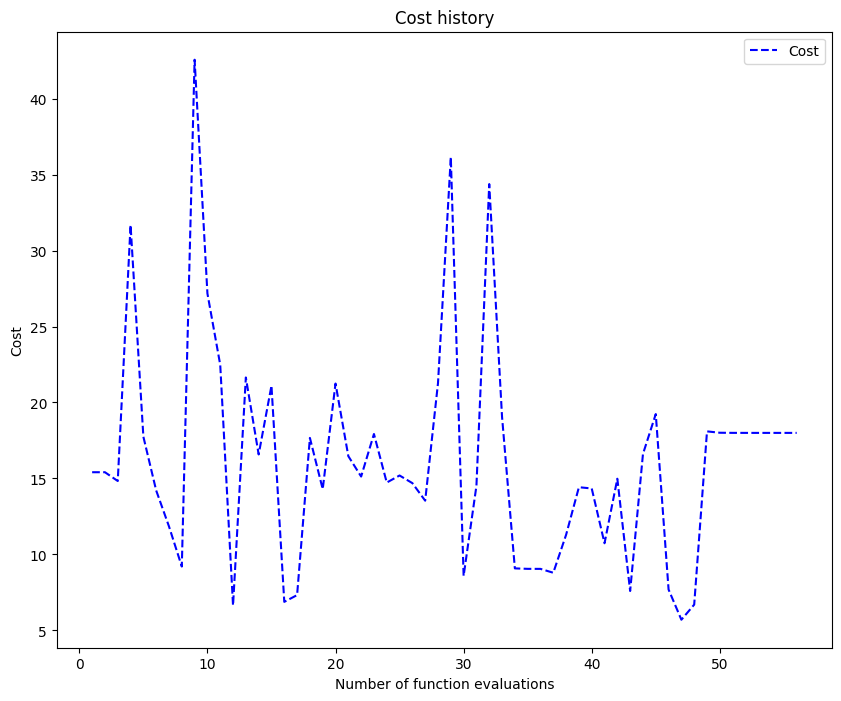

In [14]:
q.results.plot_cost()

in q128:

[1.9903347374207092, 8.101085068142028]

## RQAOA

optimize problem with (default) RQAOA

In [11]:
n_cutoff = 3

r = RQAOA()
r.set_rqaoa_parameters(n_cutoff=n_cutoff)
r.compile(problem)
r.optimize()


print intermediate QAOA optimized angles

In [12]:
for i in range(3):
    print('QAOA step {}, optimized angles:'.format(i), r.results.get_qaoa_step_optimized_angles(i))

QAOA step 0, optimized angles: [0.36555461292063335, 0.3835115196403445]
QAOA step 1, optimized angles: [0.3747198513684388, 0.37763678580099197]
QAOA step 2, optimized angles: [0.5248213190712089, -0.5568536793468271]


in q128:

QAOA step 0, optimized angles: [0.36555461292063335, 0.3835115196403445]

QAOA step 1, optimized angles: [0.3747198513684388, 0.37763678580099197]

QAOA step 2, optimized angles: [0.5248213190712089, -0.5568536793468271]